<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Gradient Boost

### Initializations

In [5]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [6]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Feature Selection on Complete Training Set

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from IPython.display import clear_output
import itertools as it

In [9]:
dff = pd.read_pickle('exchange/hr_01_enriched_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
satisfactionLevel                  10000 non-null float64
yearsSinceEvaluation               10000 non-null float64
numberOfProjects                   10000 non-null int64
averageMonthlyHours                10000 non-null int64
yearsAtCompany                     10000 non-null int64
workAccident                       10000 non-null category
hasLeftCompany                     10000 non-null category
gotPromotion                       10000 non-null category
department                         10000 non-null category
salary                             10000 non-null category
projectsPerYear                    10000 non-null float64
hoursPerProject                    10000 non-null float64
satisfactionHours                  10000 non-null float64
workingHoursSinceLastEvaluation    10000 non-null float64
evaluationSatisfaction             10000 non-null float64
projectsPerWorkingHour 

In [10]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [11]:
columns = list(dff.columns)
columns.remove('hasLeftCompany')
columns

['satisfactionLevel',
 'yearsSinceEvaluation',
 'numberOfProjects',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'gotPromotion',
 'department',
 'salary',
 'projectsPerYear',
 'hoursPerProject',
 'satisfactionHours',
 'workingHoursSinceLastEvaluation',
 'evaluationSatisfaction',
 'projectsPerWorkingHour',
 'valuableEmployee']

In [199]:
results = pd.DataFrame([], columns=['combination', 'score'])
for i in range(0,4):
    combinations = set(it.combinations(columns,i))
    for idx, comb in enumerate(combinations):
        print()
        print('calculating... combinations with ' + str(i) + ' elements :: ' + str(idx + 1) + ' of ' + str(len(combinations)))
        comb = list(comb)
        comb.append('hasLeftCompany')
        df = pd.get_dummies(dff.drop(comb, axis=1)).join(dff[['hasLeftCompany']])
        y = df['hasLeftCompany'].values
        X = df.drop(['hasLeftCompany'], axis=1).values
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        clf = GradientBoostingClassifier(learning_rate=0.0125, n_estimators=1440,max_depth=11,min_samples_split=240, min_samples_leaf=1, subsample=0.8, random_state=10,max_features=8)
        scores = cross_val_score(clf, X_scaled, y, cv=10, n_jobs=-1)
        results = results.append(pd.DataFrame([[','.join(comb), scores.mean()]], columns=results.columns))
        clear_output()
        print(color.BOLD + 'best scores so far:' + color.END)
        print(results.sort_values('score', ascending=False).head(5))

best scores so far:
                                         combination     score
0           workAccident,gotPromotion,hasLeftCompany  0.988201
0                          department,hasLeftCompany  0.988100
0  workAccident,gotPromotion,department,hasLeftCo...  0.988001
0                        workAccident,hasLeftCompany  0.988000
0             workAccident,department,hasLeftCompany  0.987901

calculating... combinations with 3 elements :: 67 of 84


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/chris/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/chris/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10a006150, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/chris/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/chris.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10a006150, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/chris/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/chris.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "results = pd.DataFrame([], columns=['combination...ts.sort_values('score', ascending=False).head(5))", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 14, 22, 55, 21, 393380, tzinfo=tzutc()), 'msg_id': '3218FEF4E43F4F678EC0FF887C948D74', 'msg_type': 'execute_request', 'session': '6439625885794D7EAA04B08E8517770B', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '3218FEF4E43F4F678EC0FF887C948D74', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'6439625885794D7EAA04B08E8517770B']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "results = pd.DataFrame([], columns=['combination...ts.sort_values('score', ascending=False).head(5))", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 14, 22, 55, 21, 393380, tzinfo=tzutc()), 'msg_id': '3218FEF4E43F4F678EC0FF887C948D74', 'msg_type': 'execute_request', 'session': '6439625885794D7EAA04B08E8517770B', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '3218FEF4E43F4F678EC0FF887C948D74', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'6439625885794D7EAA04B08E8517770B'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "results = pd.DataFrame([], columns=['combination...ts.sort_values('score', ascending=False).head(5))", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 14, 22, 55, 21, 393380, tzinfo=tzutc()), 'msg_id': '3218FEF4E43F4F678EC0FF887C948D74', 'msg_type': 'execute_request', 'session': '6439625885794D7EAA04B08E8517770B', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '3218FEF4E43F4F678EC0FF887C948D74', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="results = pd.DataFrame([], columns=['combination...ts.sort_values('score', ascending=False).head(5))", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "results = pd.DataFrame([], columns=['combination...ts.sort_values('score', ascending=False).head(5))"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("results = pd.DataFrame([], columns=['combination...ts.sort_values('score', ascending=False).head(5))",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("results = pd.DataFrame([], columns=['combination...ts.sort_values('score', ascending=False).head(5))",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="results = pd.DataFrame([], columns=['combination...ts.sort_values('score', ascending=False).head(5))", store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.For object>], cell_name='<ipython-input-199-b796a7eb6b85>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1a141c63c8, execution..._before_exec=None error_in_exec=None result=None>)
   2797 
   2798         try:
   2799             for i, node in enumerate(to_run_exec):
   2800                 mod = ast.Module([node])
   2801                 code = compiler(mod, cell_name, "exec")
-> 2802                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1a131116f0, file "<ipython-input-199-b796a7eb6b85>", line 2>
        result = <ExecutionResult object at 1a141c63c8, execution..._before_exec=None error_in_exec=None result=None>
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1a131116f0, file "<ipython-input-199-b796a7eb6b85>", line 2>, result=<ExecutionResult object at 1a141c63c8, execution..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1a131116f0, file "<ipython-input-199-b796a7eb6b85>", line 2>
        self.user_global_ns = {'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "# Bibliotheken einbinden\nimport numpy as np\nimpo...axScaler\nget_ipython().magic('matplotlib inline')", "# Definition einer Klasse für Text Styles\nclass ...3[1m'\n   UNDERLINE = '\\033[4m'\n   END = '\\033[0m'", 'from sklearn.preprocessing import MinMaxScaler\nf...isplay import clear_output\nimport itertools as it', "dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')\ndff.info()", "# Datentyp von Category in Object umwandeln\nfor ...ming', col)\n    dff[col] = dff[col].astype('str')", "columns = list(dff.columns)\ncolumns.remove('hasLeftCompany')\ncolumns", "results = pd.DataFrame([], columns=['combination...ts.sort_values('score', ascending=False).head(5))", "results.sort_values('score', ascending=False).head(5)", "dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')\ndff.info()", "# Datentyp von Category in Object umwandeln\nfor ...ming', col)\n    dff[col] = dff[col].astype('str')", "df = pd.get_dummies(dff.drop([ 'department', 'ha..., axis=1)).join(df[['hasLeftCompany']])\ndf.head()", "y_train = df['hasLeftCompany'].values\ny_train", "X_train = df.drop(['hasLeftCompany'], axis=1).values\nX_train", 'scaler = MinMaxScaler()', 'X_train_scaled = scaler.fit_transform(X_train)', "dfy = pd.read_pickle('exchange/hr_01_cleaned_test.pkl')\ndfy.info()", "# Datentyp von Category in Object umwandeln\nfor ...ming', col)\n    dff[col] = dff[col].astype('str')", "df = pd.get_dummies(dfy.drop(['workAccident','go...lary', 'id'], axis=1)).join(df[['id']])\ndf.head()", "ids = df['id']\nids.head()", ...], 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {6: ['satisfactionLevel', 'yearsSinceEvaluation', 'numberOfProjects', 'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'gotPromotion', 'department', 'salary'], 8:                               combination     sc... gotPromotion,department,hasLeftCompany  0.987701, 11:    satisfactionLevel  yearsSinceEvaluation  numb...        0  
3              1  
4              0  , 12: array(['0', '0', '0', ..., '0', '0', '1'], dtype=object), 13: array([[ 0.65,  0.96,  5.  , ...,  0.  ,  0.  , ...[ 0.11,  0.88,  7.  , ...,  0.  ,  0.  ,  1.  ]]), 23:    satisfactionLevel  yearsSinceEvaluation  numb...                 0                     1  10004  , 24: 0    10000
1    10001
2    10002
3    10003
4    10004
Name: id, dtype: int64, 25: array([[ 0.81,  0.96,  4.  , ...,  0.  ,  0.  , ...[ 0.98,  0.86,  2.  , ...,  1.  ,  0.  ,  0.  ]]), 29:    satisfactionLevel  yearsSinceEvaluation  numb...000  
1  10001  
2  10002  
3  10003  
4  10004  , 30: 0    10000
1    10001
2    10002
3    10003
4    10004
Name: id, dtype: int64, ...}, 'X': array([[ 0.65,  0.96,  5.  , ...,  2.  ,  0.  , ...[ 0.11,  0.88,  7.  , ...,  4.  ,  1.  ,  0.  ]]), 'X_scaled': array([[ 0.61538462,  0.9375    ,  0.6       , ....  0.25      ,
         1.        ,  0.        ]]), 'X_test': array([[ 0.81,  0.96,  4.  , ...,  0.  ,  1.  , ...[ 0.98,  0.86,  2.  , ...,  0.  ,  1.  ,  0.  ]]), 'X_test_scaled': array([[ 0.79120879,  0.9375    ,  0.4       , ....  0.        ,
         1.        ,  0.        ]]), 'X_train': array([[ 0.65,  0.96,  5.  , ...,  0.  ,  0.  , ...[ 0.11,  0.88,  7.  , ...,  0.  ,  0.  ,  1.  ]]), ...}
        self.user_ns = {'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "# Bibliotheken einbinden\nimport numpy as np\nimpo...axScaler\nget_ipython().magic('matplotlib inline')", "# Definition einer Klasse für Text Styles\nclass ...3[1m'\n   UNDERLINE = '\\033[4m'\n   END = '\\033[0m'", 'from sklearn.preprocessing import MinMaxScaler\nf...isplay import clear_output\nimport itertools as it', "dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')\ndff.info()", "# Datentyp von Category in Object umwandeln\nfor ...ming', col)\n    dff[col] = dff[col].astype('str')", "columns = list(dff.columns)\ncolumns.remove('hasLeftCompany')\ncolumns", "results = pd.DataFrame([], columns=['combination...ts.sort_values('score', ascending=False).head(5))", "results.sort_values('score', ascending=False).head(5)", "dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')\ndff.info()", "# Datentyp von Category in Object umwandeln\nfor ...ming', col)\n    dff[col] = dff[col].astype('str')", "df = pd.get_dummies(dff.drop([ 'department', 'ha..., axis=1)).join(df[['hasLeftCompany']])\ndf.head()", "y_train = df['hasLeftCompany'].values\ny_train", "X_train = df.drop(['hasLeftCompany'], axis=1).values\nX_train", 'scaler = MinMaxScaler()', 'X_train_scaled = scaler.fit_transform(X_train)', "dfy = pd.read_pickle('exchange/hr_01_cleaned_test.pkl')\ndfy.info()", "# Datentyp von Category in Object umwandeln\nfor ...ming', col)\n    dff[col] = dff[col].astype('str')", "df = pd.get_dummies(dfy.drop(['workAccident','go...lary', 'id'], axis=1)).join(df[['id']])\ndf.head()", "ids = df['id']\nids.head()", ...], 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {6: ['satisfactionLevel', 'yearsSinceEvaluation', 'numberOfProjects', 'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'gotPromotion', 'department', 'salary'], 8:                               combination     sc... gotPromotion,department,hasLeftCompany  0.987701, 11:    satisfactionLevel  yearsSinceEvaluation  numb...        0  
3              1  
4              0  , 12: array(['0', '0', '0', ..., '0', '0', '1'], dtype=object), 13: array([[ 0.65,  0.96,  5.  , ...,  0.  ,  0.  , ...[ 0.11,  0.88,  7.  , ...,  0.  ,  0.  ,  1.  ]]), 23:    satisfactionLevel  yearsSinceEvaluation  numb...                 0                     1  10004  , 24: 0    10000
1    10001
2    10002
3    10003
4    10004
Name: id, dtype: int64, 25: array([[ 0.81,  0.96,  4.  , ...,  0.  ,  0.  , ...[ 0.98,  0.86,  2.  , ...,  1.  ,  0.  ,  0.  ]]), 29:    satisfactionLevel  yearsSinceEvaluation  numb...000  
1  10001  
2  10002  
3  10003  
4  10004  , 30: 0    10000
1    10001
2    10002
3    10003
4    10004
Name: id, dtype: int64, ...}, 'X': array([[ 0.65,  0.96,  5.  , ...,  2.  ,  0.  , ...[ 0.11,  0.88,  7.  , ...,  4.  ,  1.  ,  0.  ]]), 'X_scaled': array([[ 0.61538462,  0.9375    ,  0.6       , ....  0.25      ,
         1.        ,  0.        ]]), 'X_test': array([[ 0.81,  0.96,  4.  , ...,  0.  ,  1.  , ...[ 0.98,  0.86,  2.  , ...,  0.  ,  1.  ,  0.  ]]), 'X_test_scaled': array([[ 0.79120879,  0.9375    ,  0.4       , ....  0.        ,
         1.        ,  0.        ]]), 'X_train': array([[ 0.65,  0.96,  5.  , ...,  0.  ,  0.  , ...[ 0.11,  0.88,  7.  , ...,  0.  ,  0.  ,  1.  ]]), ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
/Users/chris/Projects/hr_competition/<ipython-input-199-b796a7eb6b85> in <module>()
     10         y = df['hasLeftCompany'].values
     11         X = df.drop(['hasLeftCompany'], axis=1).values
     12         scaler = MinMaxScaler()
     13         X_scaled = scaler.fit_transform(X)
     14         clf = GradientBoostingClassifier(learning_rate=0.0125, n_estimators=1440,max_depth=11,min_samples_split=240, min_samples_leaf=1, subsample=0.8, random_state=10,max_features=8)
---> 15         scores = cross_val_score(clf, X_scaled, y, cv=10, n_jobs=-1)
     16         results = results.append(pd.DataFrame([[','.join(comb), scores.mean()]], columns=results.columns))
     17         clear_output()
     18         print(color.BOLD + 'best scores so far:' + color.END)
     19         print(results.sort_values('score', ascending=False).head(5))

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in cross_val_score(estimator=GradientBoostingClassifier(criterion='friedman_m...e=0.8, verbose=0,
              warm_start=False), X=array([[ 0.61538462,  0.9375    ,  0.6       , ....  0.25      ,
         1.        ,  0.        ]]), y=array(['0', '0', '0', ..., '0', '0', '1'], dtype=object), groups=None, scoring=None, cv=10, n_jobs=-1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    337     cv_results = cross_validate(estimator=estimator, X=X, y=y, groups=groups,
    338                                 scoring={'score': scorer}, cv=cv,
    339                                 return_train_score=False,
    340                                 n_jobs=n_jobs, verbose=verbose,
    341                                 fit_params=fit_params,
--> 342                                 pre_dispatch=pre_dispatch)
        pre_dispatch = '2*n_jobs'
    343     return cv_results['test_score']
    344 
    345 
    346 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in cross_validate(estimator=GradientBoostingClassifier(criterion='friedman_m...e=0.8, verbose=0,
              warm_start=False), X=array([[ 0.61538462,  0.9375    ,  0.6       , ....  0.25      ,
         1.        ,  0.        ]]), y=array(['0', '0', '0', ..., '0', '0', '1'], dtype=object), groups=None, scoring={'score': <function _passthrough_scorer>}, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False)
    201     scores = parallel(
    202         delayed(_fit_and_score)(
    203             clone(estimator), X, y, scorers, train, test, verbose, None,
    204             fit_params, return_train_score=return_train_score,
    205             return_times=True)
--> 206         for train, test in cv.split(X, y, groups))
        cv.split = <bound method StratifiedKFold.split of Stratifie...d(n_splits=10, random_state=None, shuffle=False)>
        X = array([[ 0.61538462,  0.9375    ,  0.6       , ....  0.25      ,
         1.        ,  0.        ]])
        y = array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)
        groups = None
    207 
    208     if return_train_score:
    209         train_scores, test_scores, fit_times, score_times = zip(*scores)
    210         train_scores = _aggregate_score_dicts(train_scores)

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object cross_validate.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Dec 15 02:56:49 2017
PID: 40322                  Python 3.6.3: /Users/chris/anaconda3/bin/python
...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (GradientBoostingClassifier(criterion='friedman_m...e=0.8, verbose=0,
              warm_start=False), array([[ 0.61538462,  0.9375    ,  0.6       , ....  0.25      ,
         1.        ,  0.        ]]), array(['0', '0', '0', ..., '0', '0', '1'], dtype=object), {'score': <function _passthrough_scorer>}, array([ 986,  987,  998, ..., 9997, 9998, 9999]), array([   0,    1,    2, ..., 1001, 1002, 1003]), 0, None, None), {'return_times': True, 'return_train_score': False})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GradientBoostingClassifier(criterion='friedman_m...e=0.8, verbose=0,
              warm_start=False), array([[ 0.61538462,  0.9375    ,  0.6       , ....  0.25      ,
         1.        ,  0.        ]]), array(['0', '0', '0', ..., '0', '0', '1'], dtype=object), {'score': <function _passthrough_scorer>}, array([ 986,  987,  998, ..., 9997, 9998, 9999]), array([   0,    1,    2, ..., 1001, 1002, 1003]), 0, None, None)
        kwargs = {'return_times': True, 'return_train_score': False}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=GradientBoostingClassifier(criterion='friedman_m...e=0.8, verbose=0,
              warm_start=False), X=array([[ 0.61538462,  0.9375    ,  0.6       , ....  0.25      ,
         1.        ,  0.        ]]), y=array(['0', '0', '0', ..., '0', '0', '1'], dtype=object), scorer={'score': <function _passthrough_scorer>}, train=array([ 986,  987,  998, ..., 9997, 9998, 9999]), test=array([   0,    1,    2, ..., 1001, 1002, 1003]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseGradientBoosting.fit of Gradie...=0.8, verbose=0,
              warm_start=False)>
        X_train = array([[ 0.36263736,  0.15625   ,  0.        , ....  0.25      ,
         1.        ,  0.        ]])
        y_train = array(['1', '1', '1', ..., '0', '0', '1'], dtype=object)
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py in fit(self=GradientBoostingClassifier(criterion='friedman_m...e=0.8, verbose=0,
              warm_start=False), X=array([[ 0.36263737,  0.15625   ,  0.        , ....        1.        ,  0.        ]], dtype=float32), y=array([1, 1, 1, ..., 0, 0, 1]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32), monitor=None)
   1029                 X_idx_sorted = np.asfortranarray(np.argsort(X, axis=0),
   1030                                                  dtype=np.int32)
   1031 
   1032         # fit the boosting stages
   1033         n_stages = self._fit_stages(X, y, y_pred, sample_weight, random_state,
-> 1034                                     begin_at_stage, monitor, X_idx_sorted)
        begin_at_stage = 0
        monitor = None
        X_idx_sorted = array([[2004, 1823,    0, ..., 2492, 2416,    0]...3590, 8998, ..., 4499, 8998, 6569]], dtype=int32)
   1035         # change shape of arrays after fit (early-stopping or additional ests)
   1036         if n_stages != self.estimators_.shape[0]:
   1037             self.estimators_ = self.estimators_[:n_stages]
   1038             self.train_score_ = self.train_score_[:n_stages]

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py in _fit_stages(self=GradientBoostingClassifier(criterion='friedman_m...e=0.8, verbose=0,
              warm_start=False), X=array([[ 0.36263737,  0.15625   ,  0.        , ....        1.        ,  0.        ]], dtype=float32), y=array([1, 1, 1, ..., 0, 0, 1]), y_pred=array([[-1.16108087],
       [-1.16108087],
    ...87],
       [-1.16108087],
       [-1.16108087]]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32), random_state=<mtrand.RandomState object>, begin_at_stage=0, monitor=None, X_idx_sorted=array([[2004, 1823,    0, ..., 2492, 2416,    0]...3590, 8998, ..., 4499, 8998, 6569]], dtype=int32))
   1084                                       sample_weight[~sample_mask])
   1085 
   1086             # fit next stage of trees
   1087             y_pred = self._fit_stage(i, X, y, y_pred, sample_weight,
   1088                                      sample_mask, random_state, X_idx_sorted,
-> 1089                                      X_csc, X_csr)
        X_csc = None
        X_csr = None
   1090 
   1091             # track deviance (= loss)
   1092             if do_oob:
   1093                 self.train_score_[i] = loss_(y[sample_mask],

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py in _fit_stage(self=GradientBoostingClassifier(criterion='friedman_m...e=0.8, verbose=0,
              warm_start=False), i=0, X=array([[ 0.36263737,  0.15625   ,  0.        , ....        1.        ,  0.        ]], dtype=float32), y=array([1, 1, 1, ..., 0, 0, 1]), y_pred=array([[-1.16108087],
       [-1.16108087],
    ...87],
       [-1.16108087],
       [-1.16108087]]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.]), sample_mask=array([ True,  True,  True, ...,  True,  True,  True], dtype=bool), random_state=<mtrand.RandomState object>, X_idx_sorted=array([[2004, 1823,    0, ..., 2492, 2416,    0]...3590, 8998, ..., 4499, 8998, 6569]], dtype=int32), X_csc=None, X_csr=None)
    783             if X_csc is not None:
    784                 tree.fit(X_csc, residual, sample_weight=sample_weight,
    785                          check_input=False, X_idx_sorted=X_idx_sorted)
    786             else:
    787                 tree.fit(X, residual, sample_weight=sample_weight,
--> 788                          check_input=False, X_idx_sorted=X_idx_sorted)
        X_idx_sorted = array([[2004, 1823,    0, ..., 2492, 2416,    0]...3590, 8998, ..., 4499, 8998, 6569]], dtype=int32)
    789 
    790             # update tree leaves
    791             if X_csr is not None:
    792                 loss.update_terminal_regions(tree.tree_, X_csr, y, residual, y_pred,

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='friedman_mse', ...ect at 0x1a1c9fa240>,
           splitter='best'), X=array([[ 0.36263737,  0.15625   ,  0.        , ....        1.        ,  0.        ]], dtype=float32), y=array([ 0.76152906,  0.76152906,  0.76152906, ..., -0.23847094,
       -0.23847094,  0.76152906]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.]), check_input=False, X_idx_sorted=array([[2004, 1823,    0, ..., 2492, 2416,    0]...3590, 8998, ..., 4499, 8998, 6569]], dtype=int32))
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = array([[2004, 1823,    0, ..., 2492, 2416,    0]...3590, 8998, ..., 4499, 8998, 6569]], dtype=int32)
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='friedman_mse', ...ect at 0x1a1c9fa240>,
           splitter='best'), X=array([[ 0.36263737,  0.15625   ,  0.        , ....        1.        ,  0.        ]], dtype=float32), y=array([[ 0.76152906],
       [ 0.76152906],
    ...94],
       [-0.23847094],
       [ 0.76152906]]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.]), check_input=False, X_idx_sorted=array([[2004, 1823,    0, ..., 2492, 2416,    0]...3590, 8998, ..., 4499, 8998, 6569]], dtype=int32))
    237         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    238             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    239         if max_depth <= 0:
    240             raise ValueError("max_depth must be greater than zero. ")
    241         if not (0 < max_features <= self.n_features_):
--> 242             raise ValueError("max_features must be in (0, n_features]")
    243         if not isinstance(max_leaf_nodes, (numbers.Integral, np.integer)):
    244             raise ValueError("max_leaf_nodes must be integral number but was "
    245                              "%r" % max_leaf_nodes)
    246         if -1 < max_leaf_nodes < 2:

ValueError: max_features must be in (0, n_features]
___________________________________________________________________________

In [216]:
results.sort_values('score', ascending=False).head(10)

,combination,score
0,"workAccident,gotPromotion,hasLeftCompany",0.988201
0,"department,hasLeftCompany",0.988100
0,"workAccident,gotPromotion,department,hasLeftCo...",0.988001
0,"workAccident,hasLeftCompany",0.988000
0,"workAccident,department,hasLeftCompany",0.987901
0,"gotPromotion,hasLeftCompany",0.987900
0,"salary,hasLeftCompany",0.987801
0,"gotPromotion,salary,hasLeftCompany",0.987801
0,hasLeftCompany,0.987801
0,"gotPromotion,department,hasLeftCompany",0.987800


### Load Data with Selected Features from Above

In [12]:
dff = pd.read_pickle('exchange/hr_01_enriched_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
satisfactionLevel                  10000 non-null float64
yearsSinceEvaluation               10000 non-null float64
numberOfProjects                   10000 non-null int64
averageMonthlyHours                10000 non-null int64
yearsAtCompany                     10000 non-null int64
workAccident                       10000 non-null category
hasLeftCompany                     10000 non-null category
gotPromotion                       10000 non-null category
department                         10000 non-null category
salary                             10000 non-null category
projectsPerYear                    10000 non-null float64
hoursPerProject                    10000 non-null float64
satisfactionHours                  10000 non-null float64
workingHoursSinceLastEvaluation    10000 non-null float64
evaluationSatisfaction             10000 non-null float64
projectsPerWorkingHour 

In [13]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [15]:
df = pd.get_dummies(dff.drop([ 'hasLeftCompany'], axis=1)).join(dff[['hasLeftCompany']])
df.head()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,projectsPerYear,hoursPerProject,satisfactionHours,workingHoursSinceLastEvaluation,evaluationSatisfaction,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,hasLeftCompany
0,0.65,0.96,5,226,2,2.500000,1084.8,146.90,2603.52,0.6240,...,0,1,0,0,0,0,0,0,1,0
1,0.88,0.80,3,166,2,1.500000,1328.0,146.08,1593.60,0.7040,...,0,0,0,0,0,0,0,1,0,0
2,0.69,0.98,3,214,2,1.500000,1712.0,147.66,2516.64,0.6762,...,0,0,0,1,0,0,0,1,0,0
3,0.41,0.47,2,154,3,0.666667,2772.0,63.14,868.56,0.1927,...,0,0,0,1,0,0,0,1,0,1
4,0.87,0.76,5,254,2,2.500000,1219.2,220.98,2316.48,0.6612,...,0,0,0,0,0,0,0,1,0,0


In [16]:
y_train = df['hasLeftCompany'].values
y_train

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [17]:
X_train = df.drop(['hasLeftCompany'], axis=1).values
X_train

array([[ 0.65,  0.96,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.88,  0.8 ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.69,  0.98,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ..., 
       [ 0.83,  0.86,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.74,  0.56,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  0.  ,  0.  ,  1.  ]])

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)

In [20]:
dfy = pd.read_pickle('exchange/hr_01_enriched_test.pkl')
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 17 columns):
id                                 4999 non-null int64
satisfactionLevel                  4999 non-null float64
yearsSinceEvaluation               4999 non-null float64
numberOfProjects                   4999 non-null int64
averageMonthlyHours                4999 non-null int64
yearsAtCompany                     4999 non-null int64
workAccident                       4999 non-null category
gotPromotion                       4999 non-null category
department                         4999 non-null category
salary                             4999 non-null category
projectsPerYear                    4999 non-null float64
hoursPerProject                    4999 non-null float64
satisfactionHours                  4999 non-null float64
workingHoursSinceLastEvaluation    4999 non-null float64
evaluationSatisfaction             4999 non-null float64
projectsPerWorkingHour             4999 no

In [21]:
# Datentyp von Category in Object umwandeln
for col in dfy.select_dtypes(['category']):
    print('transforming', col)
    dfy[col] = dfy[col].astype('str')

transforming workAccident
transforming gotPromotion
transforming department
transforming salary


In [22]:
df = pd.get_dummies(dfy.drop(['id'], axis=1)).join(dfy[['id']])
df.head()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,projectsPerYear,hoursPerProject,satisfactionHours,workingHoursSinceLastEvaluation,evaluationSatisfaction,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,id
0,0.81,0.96,4,219,2,2.000000,1314.0,177.39,2522.88,0.7776,...,0,0,0,0,0,1,0,1,0,10000
1,0.86,0.84,4,246,6,0.666667,4428.0,211.56,2479.68,0.7224,...,0,0,0,0,0,0,0,1,0,10001
2,0.90,0.66,4,242,3,1.333333,2178.0,217.80,1916.64,0.5940,...,0,0,0,0,1,0,1,0,0,10002
3,0.37,0.54,2,131,3,0.666667,2358.0,48.47,848.88,0.1998,...,0,0,0,0,0,0,0,0,1,10003
4,0.52,0.96,3,271,3,1.000000,3252.0,140.92,3121.92,0.4992,...,0,0,0,0,0,1,0,0,1,10004


In [23]:
ids = df['id']
ids.head()

0    10000
1    10001
2    10002
3    10003
4    10004
Name: id, dtype: int64

In [24]:
X_test = df.drop(['id'], axis=1).values
X_test

array([[ 0.81,  0.96,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.86,  0.84,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.9 ,  0.66,  4.  , ...,  1.  ,  0.  ,  0.  ],
       ..., 
       [ 0.66,  0.73,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.79,  1.  ,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.98,  0.86,  2.  , ...,  0.  ,  1.  ,  0.  ]])

In [25]:
X_test_scaled = scaler.transform(X_test)

#### Tuning tree-specific parameters

In [26]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_test1 = {'n_estimators':range(60,121,5)}
clf = GradientBoostingClassifier(learning_rate=0.3, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
gsearch1 = GridSearchCV(estimator=clf,param_grid=param_test1,n_jobs=-1,iid=False, cv=5)
gsearch1.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': range(60, 121, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.97870, std: 0.00150, params: {'n_estimators': 60},
  mean: 0.97900, std: 0.00187, params: {'n_estimators': 65},
  mean: 0.97990, std: 0.00289, params: {'n_estimators': 70},
  mean: 0.97990, std: 0.00307, params: {'n_estimators': 75},
  mean: 0.98060, std: 0.00188, params: {'n_estimators': 80},
  mean: 0.98140, std: 0.00297, params: {'n_estimators': 85},
  mean: 0.98200, std: 0.00316, params: {'n_estimators': 90},
  mean: 0.98280, std: 0.00277, params: {'n_estimators': 95},
  mean: 0.98290, std: 0.00323, params: {'n_estimators': 100},
  mean: 0.98340, std: 0.00315, params: {'n_estimators': 105},
  mean: 0.98270, std: 0.00279, params: {'n_estimators': 110},
  mean: 0.98280, std: 0.00308, params: {'n_estimators': 115},
  mean: 0.98320, std: 0.00254, params: {'n_estimators': 120}],
 {'n_estimators': 105},
 0.98339999999999994)

In [36]:
param_test2 = {'max_depth':range(8,12,1), 'min_samples_split':range(300,401,10)}
clf=GradientBoostingClassifier(learning_rate=0.3, n_estimators=105, max_features='sqrt', subsample=0.8, random_state=10)
gsearch2 = GridSearchCV(estimator=clf, 
param_grid = param_test2,n_jobs=-1,iid=False, cv=5)
gsearch2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=105,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(8, 12), 'min_samples_split': range(300, 401, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98240, std: 0.00111, params: {'max_depth': 8, 'min_samples_split': 300},
  mean: 0.98260, std: 0.00289, params: {'max_depth': 8, 'min_samples_split': 310},
  mean: 0.98350, std: 0.00145, params: {'max_depth': 8, 'min_samples_split': 320},
  mean: 0.98230, std: 0.00117, params: {'max_depth': 8, 'min_samples_split': 330},
  mean: 0.98130, std: 0.00242, params: {'max_depth': 8, 'min_samples_split': 340},
  mean: 0.98310, std: 0.00280, params: {'max_depth': 8, 'min_samples_split': 350},
  mean: 0.98380, std: 0.00147, params: {'max_depth': 8, 'min_samples_split': 360},
  mean: 0.98320, std: 0.00150, params: {'max_depth': 8, 'min_samples_split': 370},
  mean: 0.98400, std: 0.00228, params: {'max_depth': 8, 'min_samples_split': 380},
  mean: 0.98330, std: 0.00199, params: {'max_depth': 8, 'min_samples_split': 390},
  mean: 0.98290, std: 0.00263, params: {'max_depth': 8, 'min_samples_split': 400},
  mean: 0.98380, std: 0.00144, params: {'max_depth': 9, 'min_samples_split': 300},
  me

In [40]:
param_test3 = {'min_samples_split':range(300,401,20), 'min_samples_leaf':range(1,5,1)}
clf=GradientBoostingClassifier(learning_rate=0.3, n_estimators=105, max_features='sqrt', subsample=0.8, random_state=10, max_depth=10)
gsearch3 = GridSearchCV(estimator=clf, param_grid = param_test3, n_jobs=-1,iid=False, cv=5)
gsearch3.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=10,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=105,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_split': range(300, 401, 20), 'min_samples_leaf': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98370, std: 0.00196, params: {'min_samples_leaf': 1, 'min_samples_split': 300},
  mean: 0.98410, std: 0.00222, params: {'min_samples_leaf': 1, 'min_samples_split': 320},
  mean: 0.98310, std: 0.00124, params: {'min_samples_leaf': 1, 'min_samples_split': 340},
  mean: 0.98260, std: 0.00432, params: {'min_samples_leaf': 1, 'min_samples_split': 360},
  mean: 0.98330, std: 0.00223, params: {'min_samples_leaf': 1, 'min_samples_split': 380},
  mean: 0.98330, std: 0.00169, params: {'min_samples_leaf': 1, 'min_samples_split': 400},
  mean: 0.98340, std: 0.00183, params: {'min_samples_leaf': 2, 'min_samples_split': 300},
  mean: 0.98480, std: 0.00121, params: {'min_samples_leaf': 2, 'min_samples_split': 320},
  mean: 0.98400, std: 0.00217, params: {'min_samples_leaf': 2, 'min_samples_split': 340},
  mean: 0.98290, std: 0.00213, params: {'min_samples_leaf': 2, 'min_samples_split': 360},
  mean: 0.98320, std: 0.00125, params: {'min_samples_leaf': 2, 'min_samples_split': 380},
  mean: 0.

In [42]:
param_test4 = {'max_features':range(1,13,1)}
clf=GradientBoostingClassifier(learning_rate=0.3, n_estimators=105,max_depth=11, min_samples_split=320, min_samples_leaf=2, subsample=0.8, random_state=10)
gsearch4 = GridSearchCV(estimator=clf, param_grid = param_test4,n_jobs=-1,iid=False, cv=5)
gsearch4.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=11,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=320,
              min_weight_fraction_leaf=0.0, n_estimators=105,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_features': range(1, 13)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [43]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98060, std: 0.00252, params: {'max_features': 1},
  mean: 0.98250, std: 0.00105, params: {'max_features': 2},
  mean: 0.98400, std: 0.00158, params: {'max_features': 3},
  mean: 0.98390, std: 0.00139, params: {'max_features': 4},
  mean: 0.98360, std: 0.00258, params: {'max_features': 5},
  mean: 0.98410, std: 0.00159, params: {'max_features': 6},
  mean: 0.98400, std: 0.00145, params: {'max_features': 7},
  mean: 0.98510, std: 0.00150, params: {'max_features': 8},
  mean: 0.98390, std: 0.00229, params: {'max_features': 9},
  mean: 0.98460, std: 0.00280, params: {'max_features': 10},
  mean: 0.98350, std: 0.00251, params: {'max_features': 11},
  mean: 0.98400, std: 0.00249, params: {'max_features': 12}],
 {'max_features': 8},
 0.98510000000000009)

#### Tuning subsample and making models with lower learning rate

In [44]:
param_test5 = {'subsample':[0.7,0.75,0.775,0.8,0.825,0.85,0.9]}
clf=GradientBoostingClassifier(learning_rate=0.3, n_estimators=105,max_depth=11,min_samples_split=320, min_samples_leaf=2, subsample=0.8, random_state=10,max_features=8)
gsearch5 = GridSearchCV(estimator=clf,param_grid = param_test5,n_jobs=-1,iid=False, cv=5)
gsearch5.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=11,
              max_features=8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=320,
              min_weight_fraction_leaf=0.0, n_estimators=105,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.7, 0.75, 0.775, 0.8, 0.825, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98250, std: 0.00308, params: {'subsample': 0.7},
  mean: 0.98310, std: 0.00254, params: {'subsample': 0.75},
  mean: 0.98370, std: 0.00169, params: {'subsample': 0.775},
  mean: 0.98510, std: 0.00150, params: {'subsample': 0.8},
  mean: 0.98350, std: 0.00274, params: {'subsample': 0.825},
  mean: 0.98400, std: 0.00245, params: {'subsample': 0.85},
  mean: 0.98470, std: 0.00242, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.98510000000000009)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
clf = GradientBoostingClassifier(learning_rate=0.3, n_estimators=105,max_depth=11,min_samples_split=320, min_samples_leaf=2, subsample=0.8, random_state=10,max_features=8)

In [72]:
param_space = {'n_estimators':[210,420,840,1680], 'learning_rate':[0.075,0.0375,0.01875,0.009375]}

In [73]:
gs = GridSearchCV(clf, param_space, cv=5, n_jobs=-1)

In [74]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=11,
              max_features=8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=320,
              min_weight_fraction_leaf=0.0, n_estimators=105,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [210, 420, 840, 1680], 'learning_rate': [0.075, 0.0375, 0.01875, 0.009375]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


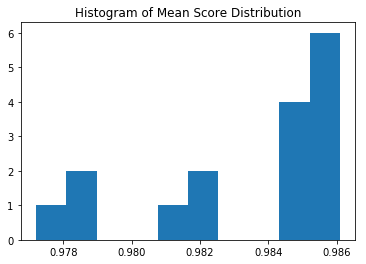

In [75]:
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [76]:
gs.best_score_

0.98609999999999998

In [77]:
gs.best_params_

{'learning_rate': 0.0375, 'n_estimators': 420}

### Training on Dataset with Selected Features using Best Hyper Parameters for Model

In [78]:
clf = GradientBoostingClassifier(learning_rate=0.0375, n_estimators=420,max_depth=11,min_samples_split=320, min_samples_leaf=2, subsample=0.8, random_state=10,max_features=8)

In [80]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
scores.mean()

0.98710048710048726

In [81]:
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.0375, loss='deviance', max_depth=11,
              max_features=8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=320,
              min_weight_fraction_leaf=0.0, n_estimators=420,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)

### Predicting Kaggle Data

In [82]:
predictions = clf.predict(X_test_scaled)
list(predictions)

['0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [83]:
list(ids)

[10000,
 10001,
 10002,
 10003,
 10004,
 10005,
 10006,
 10007,
 10008,
 10009,
 10010,
 10011,
 10012,
 10013,
 10014,
 10015,
 10016,
 10017,
 10018,
 10019,
 10020,
 10021,
 10022,
 10023,
 10024,
 10025,
 10026,
 10027,
 10028,
 10029,
 10030,
 10031,
 10032,
 10033,
 10034,
 10035,
 10036,
 10037,
 10038,
 10039,
 10040,
 10041,
 10042,
 10043,
 10044,
 10045,
 10046,
 10047,
 10048,
 10049,
 10050,
 10051,
 10052,
 10053,
 10054,
 10055,
 10056,
 10057,
 10058,
 10059,
 10060,
 10061,
 10062,
 10063,
 10064,
 10065,
 10066,
 10067,
 10068,
 10069,
 10070,
 10071,
 10072,
 10073,
 10074,
 10075,
 10076,
 10077,
 10078,
 10079,
 10080,
 10081,
 10082,
 10083,
 10084,
 10085,
 10086,
 10087,
 10088,
 10089,
 10090,
 10091,
 10092,
 10093,
 10094,
 10095,
 10096,
 10097,
 10098,
 10099,
 10100,
 10101,
 10102,
 10103,
 10104,
 10105,
 10106,
 10107,
 10108,
 10109,
 10110,
 10111,
 10112,
 10113,
 10114,
 10115,
 10116,
 10117,
 10118,
 10119,
 10120,
 10121,
 10122,
 10123,
 10124,


In [84]:
df = pd.DataFrame(
    {'id': ids,
     'left': predictions
    })
df.head()

,id,left
0,10000,0
1,10001,1
2,10002,0
3,10003,1
4,10004,0


In [85]:
df.to_csv('kaggle/gradient_boost.csv', index=False)

**Ergebnis in Kaggle:** 98.932%